Advanced Statistics for Physics Analysis 2022-23

# Lab2: probability distributions

Feltrin Antonio, ID 2097126

antonio.feltrin@studenti.unipd.it

# Ex. 1 - Discrete random variable
The probability distribution function of a discrete variablekis given by the following:
$$ p(k) = \begin{cases}
k/15 &\text{if k = 1,2,3,4,5}\\
0 &\text{else}
\end{cases} $$

1. write the R probability functions for the probability density and cumulative distribution functions,following the R naming convention
2. produce two plots showing the pdf and cdf, separately

From ``Review of Probability Distributions``, slide 11: 
- d for the pdf
- p for the cdf


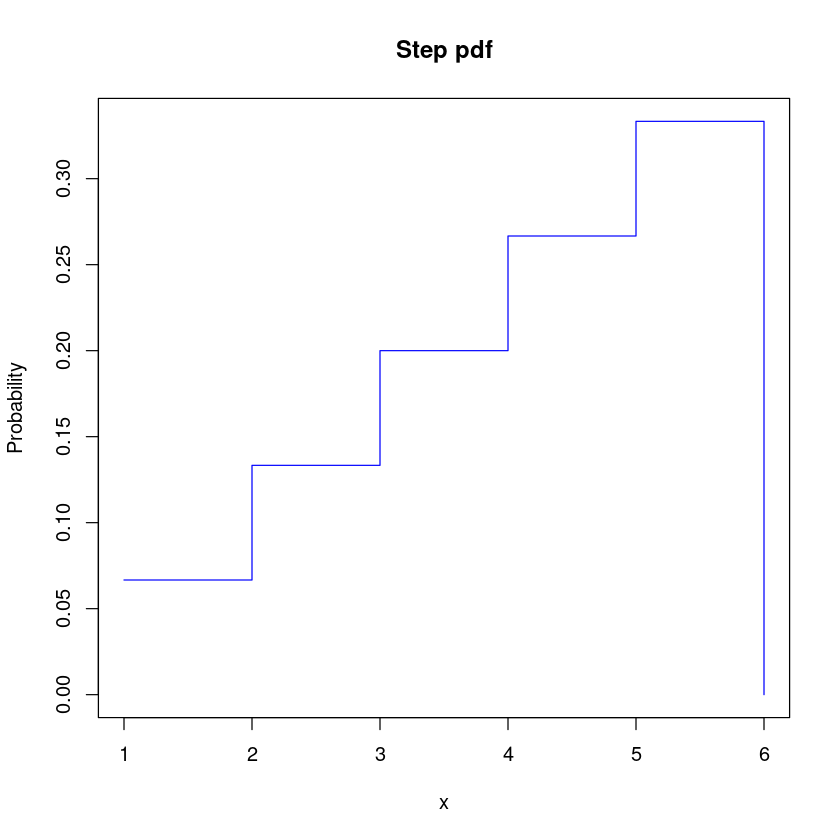

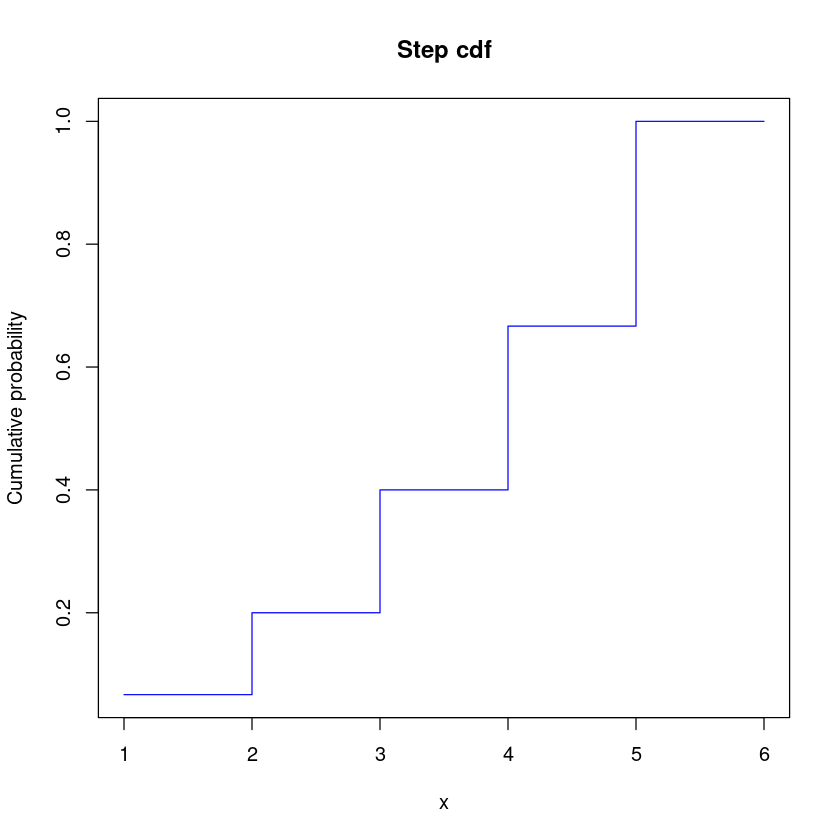

In [1]:
#1.1 
pxset <- c(1,2,3,4,5)
# pdf 1, named 'd' for pdf and '1' for ex1 
d1 <- function(x) {
    vec1 <- rep(1,length(x))
    xd <- x*vec1*(x %in% pxset)/15
    #ifelse(x %in% pxset, px <- x/15, px <- 0) 
    return(xd)
}

# cdf 1, named 'p' for cdf and '1' for ex1 
p1 <- function(x, dx=1) { # integrate d1 in x
    xp <- d1(x)
    for (c in 1:length(xp)){
        xp[c] = sum(d1(x)[1:c])*dx                                                                          
    }
    return(xp)
}

dx=1
xrow <- c(pxset,6)

plot1a = plot(xrow,d1(xrow),
main = 'Step pdf',
xlab = 'x',
ylab = 'Probability',
col = 'blue',
type ='s')

#plot(pxset, p1(pxset))
plot1b = plot(xrow,p1(xrow),
main = 'Step cdf',
xlab = 'x',
ylab = 'Cumulative probability',
col = 'blue',
type ='s')

3. compute, using R, the mean value and variance of the probability distribution
4. compute, using R, the expected value $ \mathbf{E}[k(6−k)]$

We can anwer question $3$ calculating the mean $\mathbf{E}[k] = \sum_{k=0}^{\infty} k \cdot p(k) = \sum_{k=1}^{5} k \cdot p(k)$ and the second moment of the pdf $\mathbf{E}(k^2) = \sum_{k=0}^{\infty} k^2 \cdot p(k) = \sum_{k=1}^{5} k^2 \cdot p(k)$. 

Then, the variance is $var(k) = \mathbf{E}[(k^2-\mathbf{E}(k))^2] = \mathbf{E}[k^2] - [\mathbf{E}(k)]^2$

In [2]:
mom1 <- 0
mom2 <- 0
for(k in 1:5){
    mom1 <- mom1 + k*d1(k)
    mom2 <- mom2 + k*k*d1(k)
}
cat('Our mean is ',mom1,'\n')
cat('Our variance is ',mom2 - mom1^2,'\n')
cat('E[k(6−k)] is ',6*mom1 - mom2,'\n')

Our mean is  3.666667 
Our variance is  1.555556 
E[k(6−k)] is  7 


5. write the R function that allows to sample random numbers from the probability distribution
6. using the implemented function (point (5)), sample $10^5$ random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

The histogram counts are: 6736 13213 20060 26413 33578 . They reflect decently well the original distribution: 0.06666667 0.1333333 0.2 0.2666667 0.3333333 
 We have to keep in mind that 105 are not a lot of points 


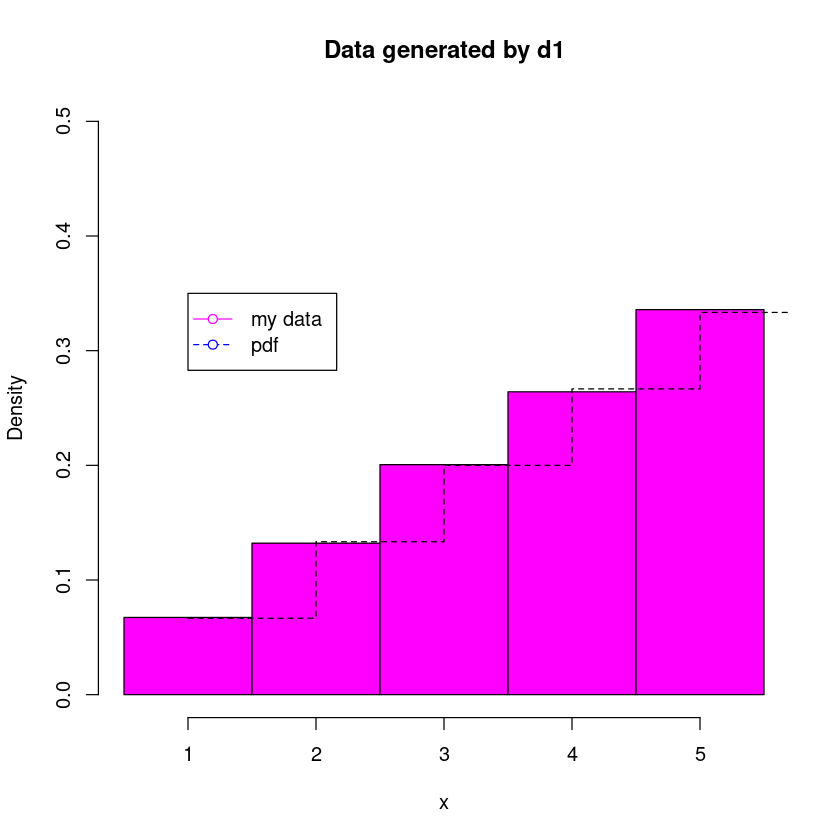

In [3]:
N1 <- 10**5
myrnglist <- rep(0,N1)

dgen <- function(num,xp){
    xdgen = min(which(p1(xp) > num)) 
    return(xdgen)
}

for(x in 1:N1){
    temprng <- runif(1)
    myrnglist[x] <- dgen(temprng,pxset)
}


hist1 <- hist(myrnglist,
main = 'Data generated by d1',
xlab = 'x',
breaks = c(.5,pxset+0.5),
freq = FALSE,
col = 'magenta',
ylim=c(0,0.5))

d1plot <- lines(x = d1(xrow), type='s',lty=2)

legend(1,0.35,legend= c('my data','pdf'), pch = 21, 
pt.bg = 'white', col = c('magenta','blue'),lty = 1:2)

cat('The histogram counts are:',hist1$counts,
'. They reflect decently well the original distribution:',d1(pxset),'\n We have to keep in mind that 105 are not a lot of points \n')

# Ex. 2 - Continuous random variable

$$ f(x) = \begin{cases}
\frac{2(x-a)}{(b-a)(c-a)} & a \leq x < c\\
\frac{2(b-x)}{(b-a)(b-c)} & c \leq x \leq b\\
0 &\text{otherwise} 
\end{cases} $$

Where $c \in [a,b]$
1. Plot the function, given the interval (a, b)
2. And write an algorithm to generate random numbers from the triangular distribution 
3. Generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve

For point 2, I will use a similar ``dgen`` function as in Exercise 1.

[1] 0.15

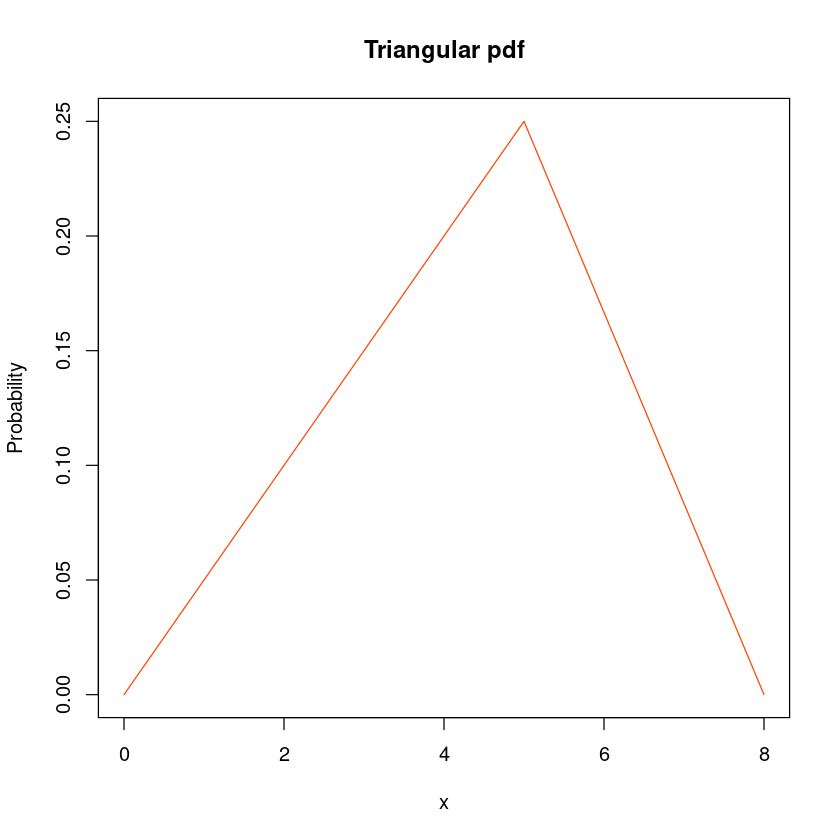

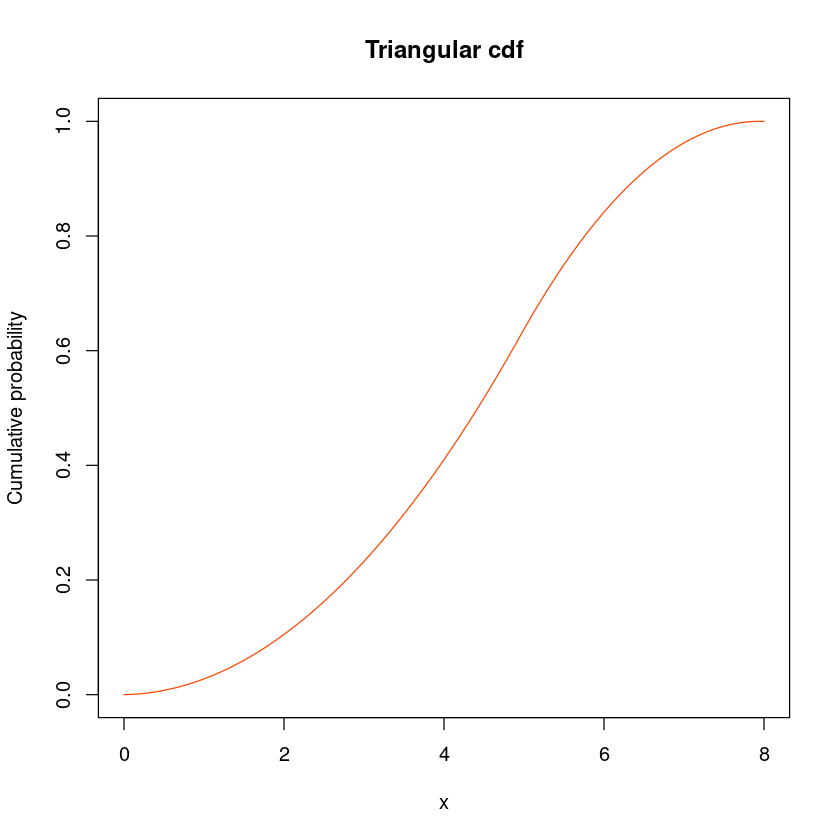

In [4]:
a = 0
b = 8
c = 5
dx = 0.1

f2 <- function(x, A=a, B=b, C=c) {
duni2 <- ifelse(x <= C,
        2*(x-A)/( (B-A)*(C-A) ),
        2*(B-x)/( (B-A)*(B-C) )
)
return (duni2)
}


p2 <- function(x, dx=1) { # integrate d1 in x
    xp <- f2(x)
    xmax = 
    for (c in 1:xmax){
        xp[c] = sum(f2(x)[1:c])*dx                                                                          
    }
    return(xp)
}

f2(3,a,b,c)

#I get pdf and cdf values
x2 <- seq(from=a, to=b, by=dx)
fx2 <- x2
ifx2 <- x2
sumall <- 0
for (i in 1:length(x2)) {
    fx2[i] <- f2(x2[i],a,b,c)
    sumall <- sumall + fx2[i]
    ifx2[i] <- sumall*dx #p2(x2[i])#
}

#plot(x2,fx2)
plot2a = plot(x2,fx2,
main = 'Triangular pdf',
xlab = 'x',
ylab = 'Probability',
col = 'orangered',
type ='l')

#plot(x2,ifx2)
plot2b = plot(x2,ifx2,
main = 'Triangular cdf',
xlab = 'x',
ylab = 'Cumulative probability',
col = 'orangered',
type ='l')

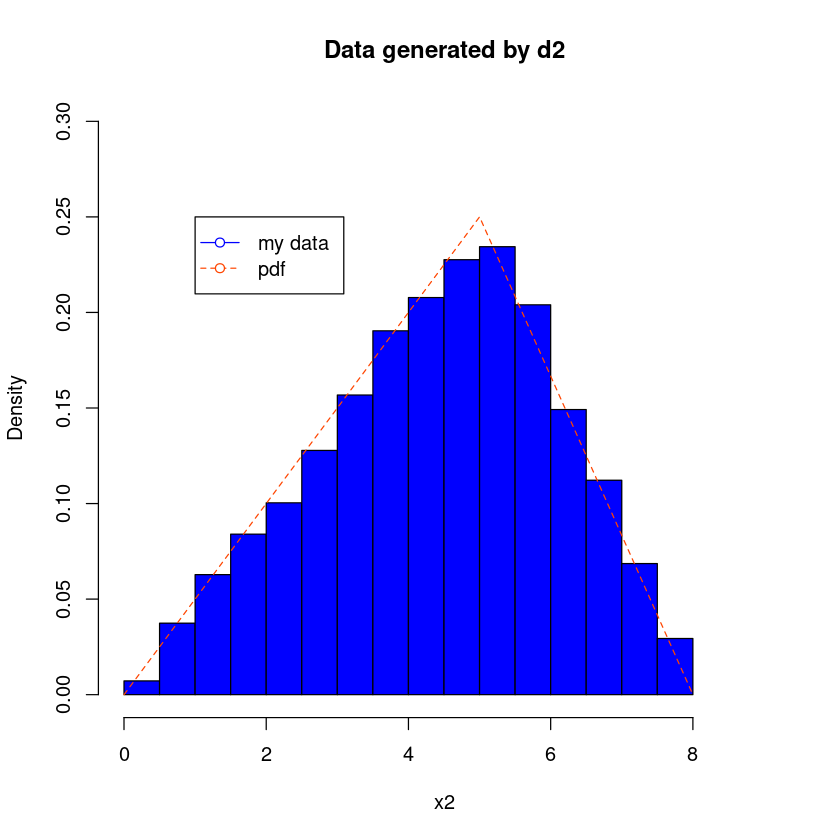

In [5]:
N2 <- 10**4
myrnglist2 <- rep(0,N2)

dgen2 <- function(num,ix = ifx2, dx2=dx){
    xdgen = dx*min(which(ix > num)) 
    return(xdgen)
}

for(x in 1:N2){
    temprng <- runif(1)
    myrnglist2[x] <- dgen2(temprng,ifx2)
}



x2a = seq(from = a, to = b, by = 1)

hist2 <- hist(myrnglist2,
main = 'Data generated by d2',
xlab = 'x2',
freq = FALSE,
col = 'blue',
xlim=c(0,9),
ylim=c(0,0.3))

lines(x2a,f2(x2a),lty=2,col='orangered')

legend(1,0.25,legend= c('my data','pdf'), pch = 21, 
pt.bg = 'white', col = c('blue','orangered'),lty = 1:2)


# Ex. 3 - At the doctor's
the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30

1. Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram 
2. What is the probability that a person will wait for less than 12 minutes ?
3. Evaluate the average waiting time from the simulated data and compare it with the expected value(calculated from theory and by manipulating the probability distributions using R)
4. What is the probability for waiting more than one hour before being received ?

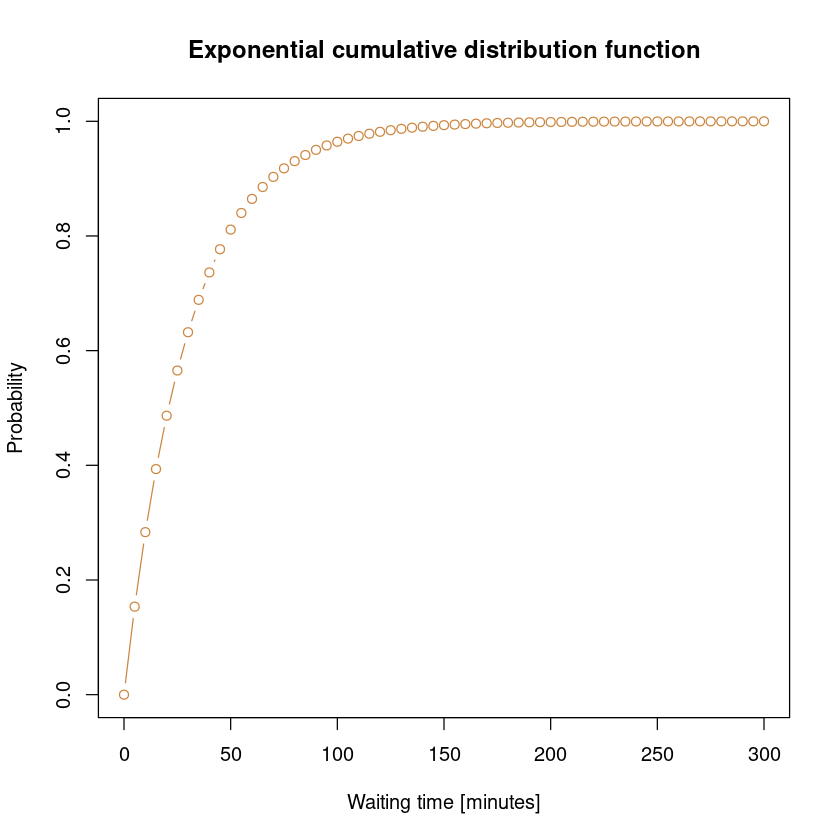

In [6]:
#units of measure = minutes
tau = 30 # = E[x] = 1/lambda
x3 = seq(0,300,5)
N3 = 60

plot3 = plot(x3,pexp(x3,rate=1/tau),
main = 'Exponential cumulative distribution function',
xlab = 'Waiting time [minutes]',
ylab = 'Probability',
col = 'peru',
type ='b')

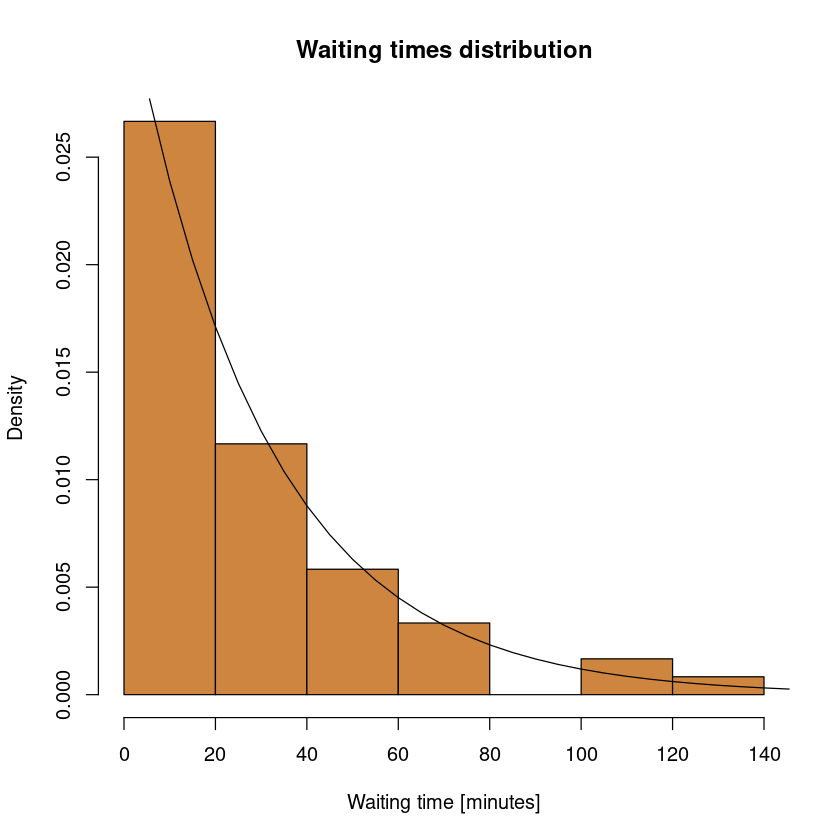

In [7]:
patients <- rexp(N3,rate=1/tau)

hist3 <- hist(patients,
main = 'Waiting times distribution', # of course it is uniform
xlab = 'Waiting time [minutes]',
col = 'peru',
freq = FALSE
)

lines(x3,dexp(x3,rate=1/tau))

In [8]:
#3.2
q3b <- pexp(12,1/tau)
cat('The probability for a patient to wait less than 12 minutes is ',q3b)

The probability for a patient to wait less than 12 minutes is  0.32968

In [9]:
cat('As a counter test, we see that the', q3b,'quantile (the area up to) 
corresponds to a waiting time of',qexp(q3b,1/tau),'min') 


As a counter test, we see that the 0.32968 quantile (the area up to) 
corresponds to a waiting time of 12 min

In [10]:
#3.3
cat('The average simulated waiting time is',mean(patients),'minutes, 
which is quite close to our expected value E[time] =',tau,'minutes')

The average simulated waiting time is 28.75332 minutes, 
which is quite close to our expected value E[time] = 30 minutes

In [11]:
#3.4
q3d <- 1-pexp(60,1/tau)
cat('The probability of waiting more than 1 hour is',q3d,'\n')
cat('In fact the', 1-q3d,'quantile  corresponds to a waiting 
time of',qexp(1-q3d,1/tau),'min') 

The probability of waiting more than 1 hour is 0.1353353 
In fact the 0.8646647 quantile  corresponds to a waiting 
time of 60 min

# Exercise 4 - Multiple choices exams
The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternatives.

A student either knows the answer, or selects randomly the answer among the five possible choices.

Assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what is the probability that the student really knew the correct answer?

I'm going to just average it out of a large number of questions. Anyway, I'm expecting a $70\%$ of known & correct answers. Of the remaining $30\%$, the student is going to correctly guess 1/5 of them, raising the total number of right answers to $70\% + (30/5)\% = 76\%$. Thus, the probability that the student really knew the correct solution to a right answer is $(70/76)\% = 92\%$.

I simulate $10**4$ questions. $C$ is the number of correct known answers

In [12]:
N4 = 10000
p = 0.7
pguess = 0.2
C = 0
Cguessed = 0
for (i in 1:N4){
    question = runif(1)
    guess = runif(1)
    answer = ifelse(question < p, 1, 0) #I know the answer; I do not need to guess
    ans2 = ifelse(guess < pguess,1,0)
    C = C + answer
    Cguessed = Cguessed + (1-answer)*ans2 #conditional probability: count only when I do not know the answer
    }

cat('I answered correctly to',(C+Cguessed)/N4,'% of the questions. Of those',
C,'were known and',Cguessed,'were guessed. Thus, the probability of really knowing a
correct answer is ',C/(C+Cguessed),'%. This is quite close to the predicted value of
 70/76 = 0.92\n')

I answered correctly to 0.7597 % of the questions. Of those 6998 were known and 599 were guessed. Thus, the probability of really knowing a
correct answer is  0.9211531 %. This is quite close to the predicted value of
 70/76 = 0.92


# Ex 5 - Waiting time

Starting from 5:00 in the morning, every half an hour there is a train from Milano Centrale to Roma Termini. We assume there is always an available seat on a train leaving from Milano.

Assuming a person arrives at a random time between 10:45 and 11:45 and compute the probability that she has to wait:

1. at most 10 minutes
2. at least 15 minutes
3. what is the average time spent waiting ?

Again, I am going to simulate $N5$ departures. I assume that if the arrival time (rounded to the minute) is equal to the departure time of the train (11:00 or 11:30), the train is missed and the waiting time is 30 minutes.
 
This exercise could also be solved analytically. There are $30$ possible waiting times, each appearing twice in a 60 minute span. So there is a $1/3$ chance to wait at most 10 minutes, and a $16/30 \approx 53\%$ probability of waiting at least 15 minutes. The average waiting time would be $15.5$ minutes.

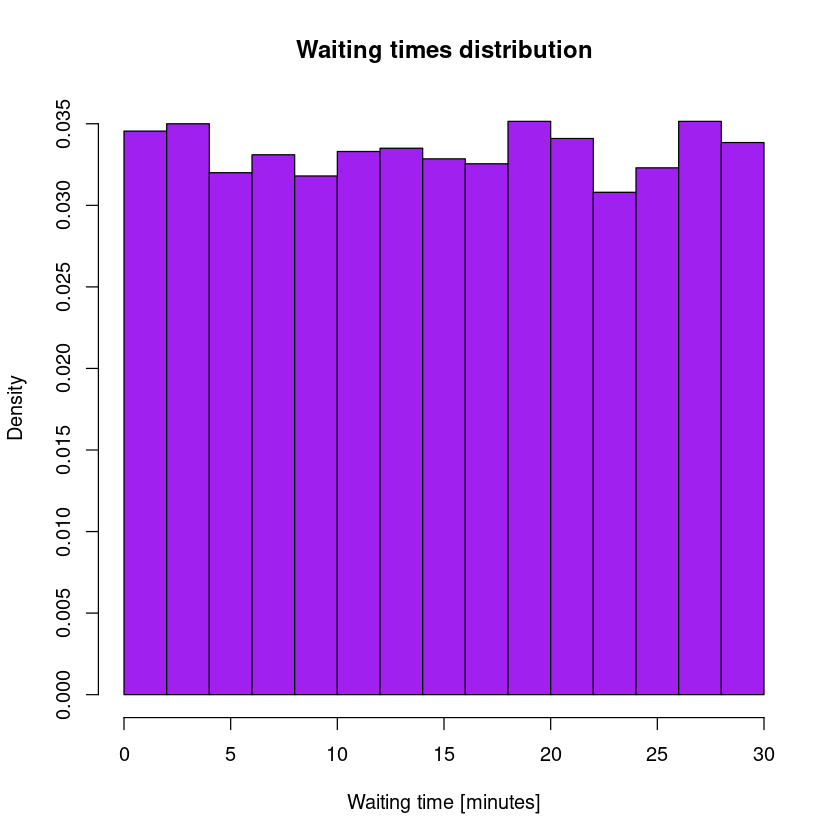

In [13]:
N5 = 10**4
departure0 = -15
departure1 = 45
delta = departure1 - departure0

waitimes = rep(0,N5)

for (i in 1:N5){
    mytime = round(runif(1,min=departure0,max=departure1))
    waitimes[i] = (delta-mytime) %% 30
    waitimes[i] = ifelse(waitimes[i]==0,30,waitimes[i])
}

hist(waitimes,
main = 'Waiting times distribution', # of course it is uniform
xlab = 'Waiting time [minutes]',
col = 'purple',
freq = FALSE
)


In [14]:
x = 18
(60-x) %% 30

[1] 12

In [15]:
w10 = length(which(waitimes <= 10))/N5
w15 = length(which(waitimes >= 15))/N5
wavg = mean(waitimes)

cat('The probability that a person waits at most 10 minutes is',w10,'\n',
'The probability that a person waits at least 15 minutes is',w15,'\n',
'The average waiting time is',wavg,'\n')

The probability that a person waits at most 10 minutes is 0.3329 
 The probability that a person waits at least 15 minutes is 0.5335 
 The average waiting time is 15.4895 


# Ex 6 - Stock investment

The annual return rate for a specific stock on the market is a normal variable with a 10% mean and a 12% standard deviation. 

1. Mr X decides to buy 200 share of that specific stock at a price of 85 Euros per share.

2. What is the probability that after a year his net profit from the investment is at least 800 Euros?

(Note: suppose there are no transaction costs and that there are no annual dividend for the stock)

As in exercise 3, I am going to exploit R built-in probability distribution functions. 

In [16]:
Xmean = 10
Xdev = 12
x6 = seq(-30,50,1)
y6 = dnorm(x6,Xmean,Xdev)

In [17]:
units = 200
profit = 800
rate = profit/units
prob_rate = 1-pnorm(4,mean=Xmean,sd=Xdev)

cat('The probability to get at least a',rate,'% return rate is',prob_rate)

The probability to get at least a 4 % return rate is 0.6914625

In [18]:
ir = length(x6)

The blue area corresponds to the 0.6914625 probability of having a return rate >= 4%

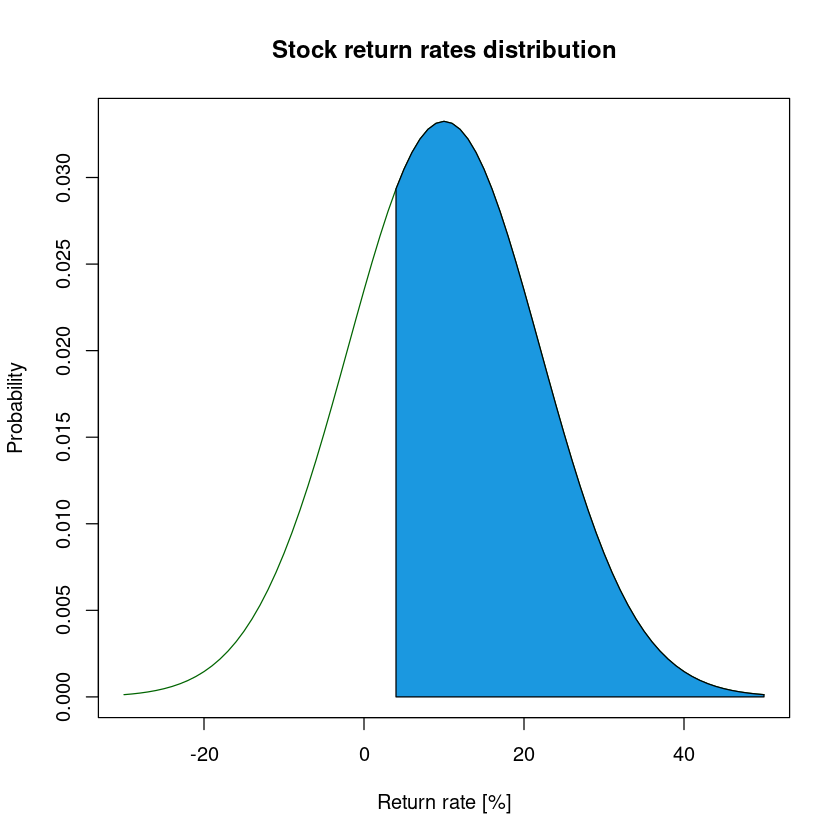

In [19]:
cat('The blue area corresponds to the',prob_rate,'probability of having a return rate >= 4%')

plot6 = plot(x6,y6,
main = 'Stock return rates distribution',
xlab = 'Return rate [%]',
ylab = 'Probability',
col = 'dark green',
type ='l')

index = which(x6==4)

polygon(x = c(4, x6[index:ir], max(x6)),
        y = c(0, y6[index:ir], 0),
        col = "#1b98e0")